In [63]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
      os.path.join(dirname, filename)

In [64]:
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import warnings
warnings.filterwarnings('ignore')
import PIL
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import preprocessing
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout,Flatten,Activation
from keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization
from keras.models import load_model
import cv2
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Input
from tensorflow.keras.optimizers import Adam
import shutil
import glob
import random

In [85]:
path = (r'/kaggle/input/brain-tumor-classification-mri/Training/')
glioma_dir= os.path.join(path,'glioma_tumor')
meningioma_dir= os.path.join(path,'meningioma_tumor')
pituitary_dir= os.path.join(path,'pituitary_tumor')
no_tumor_dir=os.path.join(path,'no_tumor')

In [86]:
os.chdir("/kaggle/working/")

In [88]:
os.makedirs('Bin/glioma/glioma')
os.makedirs('Bin/glioma/non_glioma')
os.makedirs('Bin/meningioma/meningioma')
os.makedirs('Bin/meningioma/non_meningioma')
os.makedirs('Bin/pituitary/pituitary')
os.makedirs('Bin/pituitary/non_pituitary')

# **MENINGIOMA BINARY DATA SET**

## **CREATING MENINGIOMA BINARY DATA SET**

In [89]:
path_meningioma = '/kaggle/working/Bin/meningioma'

In [90]:
os.listdir(path_meningioma)

['meningioma', 'non_meningioma']

In [91]:
for c in random.sample(os.listdir(glioma_dir),411):
    c_path= os.path.join(glioma_dir,c)
    shutil.copy(c_path, os.path.join(path_meningioma,'non_meningioma'))

In [92]:
for p in random.sample(os.listdir(pituitary_dir),411):
    p_path= os.path.join(pituitary_dir,p)
    shutil.copy(p_path,os.path.join(path_meningioma,'non_meningioma'))

In [93]:
len(os.listdir(os.path.join(path_meningioma,'non_meningioma')))

822

In [94]:
for m in os.listdir(meningioma_dir):
    m_path= os.path.join(meningioma_dir,m)
    shutil.copy(m_path, os.path.join(path_meningioma,'meningioma'))

In [95]:
len(os.listdir(os.path.join(path_meningioma,'meningioma')))

822

In [96]:
path_m= path_meningioma
image_size= 150
X1=[]
y1=[]
for folder in os.listdir(path_m):
    for subfolder in os.listdir(os.path.join(path_m,folder)):
        y1.append(folder)
        img = cv2.imread(os.path.join(path_m,folder,subfolder), cv2.IMREAD_GRAYSCALE)
        im  = cv2.resize(img,(image_size,image_size))
        im  = im/255.
        #im.reshape(-1,image_size,image_size)
        X1.append(im)
#X_arr=np.array(X1).reshape(-1,image_size,image_size)
X1=np.array(X1).reshape(-1,image_size,image_size,1)
y_arr=np.array(y1)
#X_arr=X_arr/255.
#X1= X_arr
print(X1.shape)
enc=LabelEncoder()
y1 = enc.fit_transform(y_arr)
y1=to_categorical(y1,2)

(1644, 150, 150, 1)


In [97]:
X1_train , X1_test, y1_train, y1_test = train_test_split(X1 , y1 , test_size = 0.1, random_state = 42)
X1_train , X1_val, y1_train, y1_val = train_test_split(X1_train , y1_train , test_size = 0.1, random_state = 42)
X1_train.shape

(1331, 150, 150, 1)

## **BEST MODEL FOR MENINGIOMA BINARY DATA SET**

In [98]:
data_augmentation1 = ImageDataGenerator(shear_range = 0.1,
                                       zoom_range = 0.2, 
                                       width_shift_range=0.10,
                                       height_shift_range=0.10,
                                       horizontal_flip = True,
                                       rotation_range=20,
                                       fill_mode='nearest')
data_augmentation1.fit(X1_train)

In [99]:
def create_model(units=512, learning_rate=0.001):
    model =Sequential()
    model.add(Input(shape=(150,150,1)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same', strides=2))

# Adding a third convolutional layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same', strides=2))

# Adding a fourth convolutional layer
    model.add(Conv2D(filters=128, kernel_size=(3,3),  padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),  padding='same', strides=2))
    
    
    model.add(Conv2D(filters= 128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),  padding='same',strides=2))
    
    model.add(Conv2D(filters= 128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),  padding='same',strides=2))

                        
    model.add(Flatten())
    model.add(Dense(units=512, activation='relu'))
    
    model.add(Dense(2, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model 

model1= create_model(units=512, learning_rate=0.001)
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 64)      640       
_________________________________________________________________
dropout_2 (Dropout)          (None, 150, 150, 64)      0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 38, 38, 128)       147584    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 19, 19, 128)      

In [100]:
callbacks1=[ EarlyStopping(monitor='val_accuracy', patience=3,mode="auto",verbose=0,restore_best_weights=True),
            ModelCheckpoint(filepath='best_accuracy_binmen.hdf5', monitor='val_accuracy', verbose=0, mode='max',save_best_only=True)]

history1= model1.fit_generator(data_augmentation1.flow(X1_train,y1_train,batch_size=40), callbacks=callbacks1,
                    epochs = 50, validation_data=(X1_val,y1_val))

Epoch 1/50
34/34 [==============================] - 11s 300ms/step - loss: 0.6969 - accuracy: 0.5319 - val_loss: 0.6746 - val_accuracy: 0.5676
Epoch 2/50
34/34 [==============================] - 9s 253ms/step - loss: 0.6677 - accuracy: 0.5905 - val_loss: 0.6163 - val_accuracy: 0.7095
Epoch 3/50
34/34 [==============================] - 9s 254ms/step - loss: 0.5688 - accuracy: 0.7269 - val_loss: 0.5047 - val_accuracy: 0.7568
Epoch 4/50
34/34 [==============================] - 9s 254ms/step - loss: 0.5673 - accuracy: 0.7195 - val_loss: 0.4614 - val_accuracy: 0.7838
Epoch 5/50
34/34 [==============================] - 9s 255ms/step - loss: 0.4480 - accuracy: 0.7752 - val_loss: 0.6164 - val_accuracy: 0.6757
Epoch 6/50
34/34 [==============================] - 9s 254ms/step - loss: 0.5362 - accuracy: 0.7108 - val_loss: 0.4170 - val_accuracy: 0.8176
Epoch 7/50
34/34 [==============================] - 9s 256ms/step - loss: 0.4716 - accuracy: 0.7730 - val_loss: 0.3844 - val_accuracy: 0.8243
Epoch

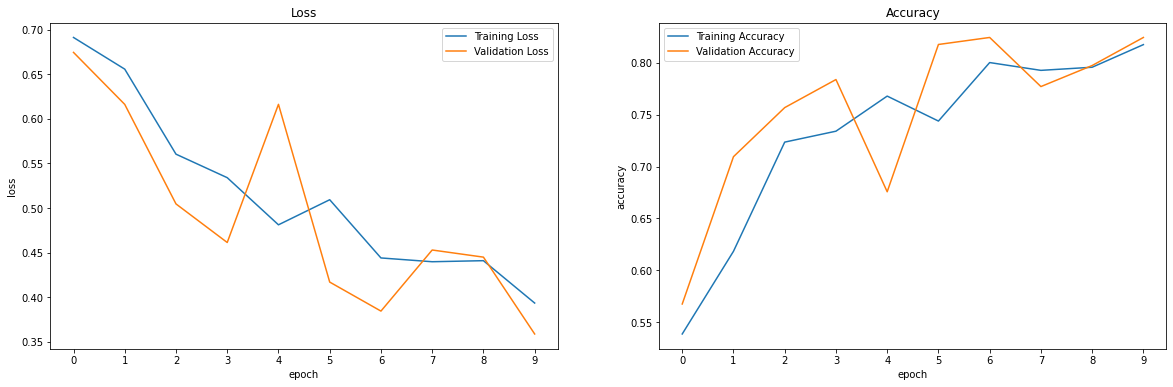

In [103]:
def plot(hist='history_num'):
    train_loss = hist.history['loss']
    val_loss =hist.history['val_loss']

    eff_epochs = len(hist.history['loss'])
    epochs_range = range(eff_epochs)

    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.xticks(epochs_range)
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.title('Loss')
    plt.legend()

    train_acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')

    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.xticks(epochs_range)
    plt.title('Accuracy')
    plt.legend()
    plt.show()


plot(history1)

In [102]:
test_loss, test_acc = model1.evaluate(X1_test,y1_test)

6/6 [==============================] - 1s 183ms/step - loss: 0.3787 - accuracy: 0.8061


In [104]:
model1.save_weights('model_bin_men_weights.h5')
model1.save('model_bin_men.h5')

# **GLIOMA BINARY DATA SET**

## **CREATING GLIOMA BINARY DATA SET**

In [107]:
path_glioma = '/kaggle/working/Bin/glioma'

In [108]:
os.listdir(path_glioma)

['glioma', 'non_glioma']

In [109]:
for g in random.sample(os.listdir(pituitary_dir),413):
    g_path= os.path.join(pituitary_dir,g)
    shutil.copy(g_path, os.path.join(path_glioma,'non_glioma'))

In [110]:
for m in random.sample(os.listdir(meningioma_dir),413):
    m_path= os.path.join(meningioma_dir,m)
    shutil.copy(m_path, os.path.join(path_glioma,'non_glioma'))

In [111]:
for p in os.listdir(glioma_dir):
    p_path= os.path.join(glioma_dir,p)
    shutil.copy(p_path, os.path.join(path_glioma,'glioma'))

In [113]:
print(len(os.listdir(os.path.join(path_glioma,'non_glioma'))))
print(len(os.listdir(os.path.join(path_glioma,'glioma'))))

826
826


In [114]:
path_m= path_glioma
image_size= 150
X3=[]
y3=[]
for folder in os.listdir(path_m):
    for subfolder in os.listdir(os.path.join(path_m,folder)):
        y3.append(folder)
        img = cv2.imread(os.path.join(path_m,folder,subfolder), cv2.IMREAD_GRAYSCALE)
        im =  cv2.resize(img,(image_size,image_size))
        im.reshape(-1,image_size,image_size)
        X3.append(im)
X_arr=np.array(X3).reshape(-1,image_size,image_size)
y_arr=np.array(y3)
print(X_arr.shape)
X_arr=X_arr/255.
X3= X_arr.reshape(-1,image_size,image_size,1)
print(X3.shape)
enc=LabelEncoder()
y3= enc.fit_transform(y_arr)
y3=to_categorical(y3,2)

(1652, 150, 150)
(1652, 150, 150, 1)


In [115]:
X3_train , X3_test, y3_train, y3_test = train_test_split(X3 , y3 , test_size = 0.1, random_state = 42)
X3_train , X3_val, y3_train, y3_val = train_test_split(X3_train , y3_train , test_size = 0.1, random_state = 42)
X3_train.shape

(1337, 150, 150, 1)

In [116]:
len(X3_train) + len(X3_test)+ len(X3_val)

1652

## **BEST MODEL FOR GLIOMA BINARY DATA SET**

In [117]:
data_augmentation3 = ImageDataGenerator(shear_range = 0.1,
                                       zoom_range = 0.2, 
                                       width_shift_range=0.10,
                                       height_shift_range=0.10,
                                       horizontal_flip = True,
                                       rotation_range=20,
                                       fill_mode='nearest')
data_augmentation3.fit(X3_train)

In [118]:
def create_model(units=512, learning_rate=0.001):
    model =Sequential()
    model.add(Input(shape=(150,150,1)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same',  strides=2))

# Adding a third convolutional layer
    model.add(Conv2D(filters=128, kernel_size=(3,3),padding='same',  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same', strides=2))

# Adding a fourth convolutional layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same', strides=2))
                        
    model.add(Flatten())
    model.add(Dense(units=units, activation='relu'))
    
    model.add(Dense(units=2, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model   

model_gl= create_model(units=512, learning_rate=0.001)

callbacks_gl=[ EarlyStopping(monitor='val_accuracy', patience=3,mode="auto",verbose=0,restore_best_weights=True),
            ModelCheckpoint(filepath='best_accuracy_bin_gl.hdf5', monitor='val_accuracy', verbose=0, mode='max',save_best_only=True)]

history_gl= model_gl.fit_generator(data_augmentation3.flow(X3_train,y3_train,batch_size=40), callbacks=callbacks_gl,
                    epochs = 50, validation_data=(X3_val,y3_val))

Epoch 1/50
34/34 [==============================] - 9s 242ms/step - loss: 0.8039 - accuracy: 0.5586 - val_loss: 0.6548 - val_accuracy: 0.5503
Epoch 2/50
34/34 [==============================] - 8s 236ms/step - loss: 0.6428 - accuracy: 0.6324 - val_loss: 0.5726 - val_accuracy: 0.6980
Epoch 3/50
34/34 [==============================] - 8s 237ms/step - loss: 0.6083 - accuracy: 0.6650 - val_loss: 0.5458 - val_accuracy: 0.7248
Epoch 4/50
34/34 [==============================] - 8s 236ms/step - loss: 0.5692 - accuracy: 0.7243 - val_loss: 0.6332 - val_accuracy: 0.6376
Epoch 5/50
34/34 [==============================] - 8s 236ms/step - loss: 0.5864 - accuracy: 0.6886 - val_loss: 0.4826 - val_accuracy: 0.7114
Epoch 6/50
34/34 [==============================] - 8s 236ms/step - loss: 0.5448 - accuracy: 0.7147 - val_loss: 0.4879 - val_accuracy: 0.7181


In [119]:
test_loss, test_acc = model_gl.evaluate(X3_test,y3_test)

6/6 [==============================] - 1s 127ms/step - loss: 0.5433 - accuracy: 0.7289


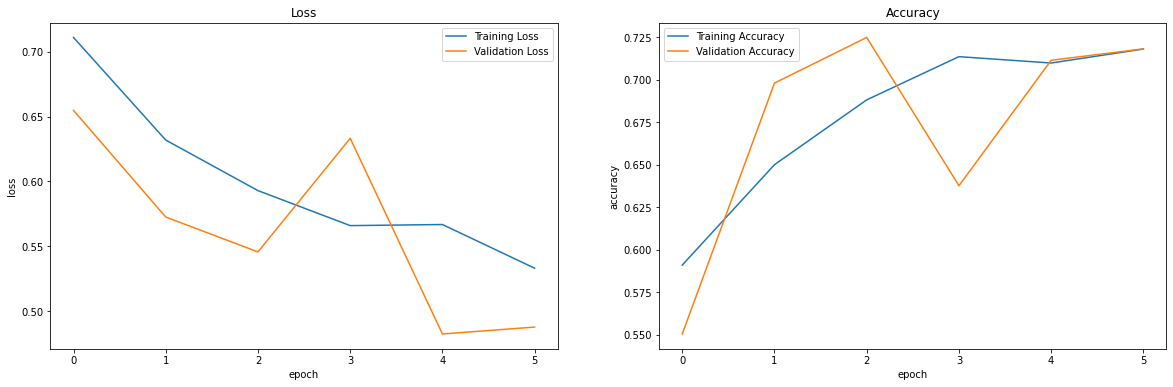

In [120]:
plot(history_gl)

In [121]:
model_gl.save('model_bin_gl.h5')
model_gl.save_weights('model_bin_gl_weights.h5')

# **PITUITARY BINARY DATA SET**

## **CREATING PITUITARY BINARY DATA SET**

In [126]:
path_pituitary = '/kaggle/working/Bin/pituitary'
os.listdir(path_pituitary)

['pituitary', 'non_pituitary']

In [127]:
for g in random.sample(os.listdir(glioma_dir),413):
    g_path= os.path.join(glioma_dir,g)
    shutil.copy(g_path, os.path.join(path_pituitary,'non_pituitary'))

for m in random.sample(os.listdir(meningioma_dir),413):
    m_path= os.path.join(meningioma_dir,m)
    shutil.copy(m_path, os.path.join(path_pituitary,'non_pituitary'))
    
len(os.listdir(os.path.join(path_pituitary,'non_pituitary')))

826

In [128]:
for p in os.listdir(pituitary_dir):
    p_path= os.path.join(pituitary_dir,p)
    shutil.copy(p_path, os.path.join(path_pituitary,'pituitary'))
    
len(os.listdir(os.path.join(path_pituitary,'pituitary')))

827

In [137]:
path_m= path_pituitary
image_size= 150
X2=[]
y2=[]
for folder in os.listdir(path_m):
    for subfolder in os.listdir(os.path.join(path_m,folder)):
        y2.append(folder)
        img = cv2.imread(os.path.join(path_m,folder,subfolder), cv2.IMREAD_GRAYSCALE)
        im =  cv2.resize(img,(image_size,image_size))
        im.reshape(-1,image_size,image_size)
        X2.append(im)
X_arr=np.array(X2).reshape(-1,image_size,image_size)
y_arr=np.array(y2)
print(X_arr.shape)
X_arr=X_arr/255.
X2= X_arr.reshape(-1,image_size,image_size,1)
print(X2.shape)
enc=LabelEncoder()
y2= enc.fit_transform(y_arr)
y2=to_categorical(y2,2)

(1653, 150, 150)
(1653, 150, 150, 1)


In [138]:
X2_train , X2_test, y2_train, y2_test = train_test_split(X2 , y2 , test_size = 0.1, random_state = 42)
X2_train , X2_val, y2_train, y2_val = train_test_split(X2_train , y2_train , test_size = 0.1, random_state = 42)
X2_train.shape

(1338, 150, 150, 1)

## **BEST MODEL FOR PITUITARY BINARY DATA SET**

In [139]:
data_augmentation2 = ImageDataGenerator(shear_range = 0.1,
                                       zoom_range = 0.2, 
                                       width_shift_range=0.10,
                                       height_shift_range=0.10,
                                       horizontal_flip = True,
                                       rotation_range=20,
                                       fill_mode='nearest')
data_augmentation2.fit(X2_train)

In [140]:
def create_model(units=512, learning_rate=0.001):
    model =Sequential()
    model.add(Input(shape=(150,150,1)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(Dropout(0.1))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same',  strides=2))

# Adding a third convolutional layer
    model.add(Conv2D(filters=128, kernel_size=(3,3),padding='same',  activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), padding='same', strides=2))

# Adding a fourth convolutional layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2),padding='same', strides=2))
                        
    model.add(Flatten())
    model.add(Dense(units=units, activation='relu'))
    
    model.add(Dense(units=2, activation='softmax'))
    
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model   

model_pt_2= create_model(units=512, learning_rate=0.001)

callbacks_pt_2=[ EarlyStopping(monitor='val_accuracy', patience=3,mode="auto",verbose=0,restore_best_weights=True),
            ModelCheckpoint(filepath='best_accuracy_bin_pt_2.hdf5', monitor='val_accuracy', verbose=0, mode='max',save_best_only=True)]

history_pt_2= model_pt_2.fit_generator(data_augmentation2.flow(X2_train,y2_train,batch_size=40), callbacks=callbacks_pt_2,
                    epochs = 50, validation_data=(X2_val,y2_val))

Epoch 1/50
34/34 [==============================] - 9s 242ms/step - loss: 0.8090 - accuracy: 0.6481 - val_loss: 0.4240 - val_accuracy: 0.8591
Epoch 2/50
34/34 [==============================] - 8s 237ms/step - loss: 0.5236 - accuracy: 0.7347 - val_loss: 0.4974 - val_accuracy: 0.7584
Epoch 3/50
34/34 [==============================] - 8s 236ms/step - loss: 0.5069 - accuracy: 0.7653 - val_loss: 0.4090 - val_accuracy: 0.8926
Epoch 4/50
34/34 [==============================] - 8s 238ms/step - loss: 0.4508 - accuracy: 0.7979 - val_loss: 0.4332 - val_accuracy: 0.8456
Epoch 5/50
34/34 [==============================] - 8s 235ms/step - loss: 0.4411 - accuracy: 0.8058 - val_loss: 0.3550 - val_accuracy: 0.8792
Epoch 6/50
34/34 [==============================] - 8s 237ms/step - loss: 0.4082 - accuracy: 0.8175 - val_loss: 0.3361 - val_accuracy: 0.8725


In [141]:
test_loss, test_acc = model_pt_2.evaluate(X2_test,y2_test)

6/6 [==============================] - 1s 130ms/step - loss: 0.4204 - accuracy: 0.8675


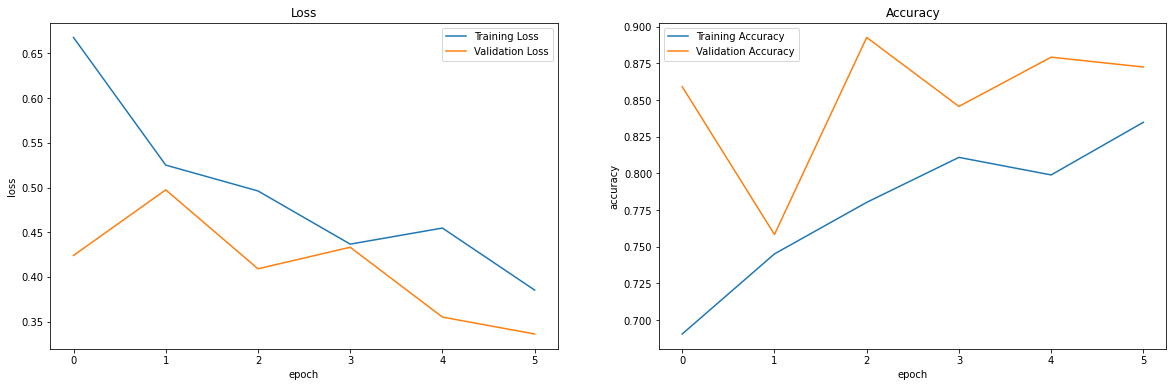

In [142]:
plot(history_pt_2)

In [143]:
model_pt_2.save('model_bin_pt_2.h5')
model_pt_2.save_weights('model_bin_pt_2_weights.h5')